# Amazon Customer Reviews Dataset

To download files
```
# Download .gz
!aws s3 cp s3://amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz db.gz --no-sign-request

# Check size of file
!du -sh db.gz #!ls -l db.gz
```

### Main functions to download dataset

In [0]:
!pip install awscli tqdm mlxtend

import numpy as np
import pandas as pd
import csv
import os
from tqdm import tqdm
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import gc

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

%matplotlib inline

np.random.seed(42)

categories = [

# US REVIEWS DATASET:
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz',                      # size: 1.59 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz',                       # size: 0.15 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz',                   # size: 0.44 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz',                     # size: 1.41 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz',                         # size: 0.13 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz',                          # size: 0.78 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz',                         # size: 0.31 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz',                        # size: 0.81 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz',                      # size: 0.09 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz',                         # size: 0.60 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz',                  # size: 0.48 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz',      # size: 0.02 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz',                            # size: 1.41 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz',                      # size: 0.42 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz',               # size: 0.48 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz',           # size: 0.18 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz',                         # size: 1.42 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz',            # size: 0.02 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz',                   # size: 0.52 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz',              # size: 0.02 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz',                       # size: 0.06 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz',               # size: 0.45 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz',                       # size: 0.87 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz',                       # size: 0.23 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz',              # size: 0.47 GB.       
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz',            # size: 0.18 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz',                          # size: 1.01 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz',          # size: 0.94 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz',                       # size: 0.37 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz',                     # size: 0.01 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz',                     # size: 0.14 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz',                   # size: 0.65 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz',           # size: 0.03 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz',        # size: 0.47 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz',              # size: 0.02 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz',        # size: 0.24 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz',        # size: 1.21 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz',        # size: 2.51 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz',                        # size: 0.41 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz',                         # size: 1.24 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz',                         # size: 2.51 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz',                         # size: 2.55 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz',                        # size: 0.85 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz',                          # size: 0.33 GB.
# 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz',                    # size: 0.54 GB.
  's3://amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz',                       # size: 0.60 GB.

# MULTILINGUAL REVIEWS DATASET:
#'s3://amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz',                  # size: 1.37 GB.
#'s3://amazon-reviews-pds/tsv/amazon_reviews_multilingual_UK_v1_00.tsv.gz',                  # size: 0.33 GB.
#'s3://amazon-reviews-pds/tsv/amazon_reviews_multilingual_JP_v1_00.tsv.gz',                  # size: 0.09 GB.
#'s3://amazon-reviews-pds/tsv/amazon_reviews_multilingual_FR_v1_00.tsv.gz',                  # size: 0.07 GB.
#'s3://amazon-reviews-pds/tsv/amazon_reviews_multilingual_DE_v1_00.tsv.gz'                   # size: 0.23 GB.
]


def download_everything(categories):

  # Aprox: ~ 30.15 GB for US.
  #        ~  2.07 GB for Multiligual.
  for category in tqdm(categories, ncols=80):

    # file name: 'us_category_v1_xx.tsv.gz'
    name = category.split('/')[-1].split('_')[2:]
    name = '_'.join(name)

    # Skip if exists, eiste giannides eimai sigouros tha kanete malakia
    if os.path.isfile(f'data/{name}'):
      continue
    else:
      # download into 'data/'
      os.system(f'aws s3 cp {category} data/{name} --no-sign-request')


def request_dataframe(file, usecols=np.arange(15), keep_verified=False, clean=True):

  # DATA COLUMNS:
  # 0:  marketplace       - 2 letter country code of the marketplace where the review was written.
  # 1:  customer_id       - Random identifier that can be used to aggregate reviews written by a single author.
  # 2:  review_id         - The unique ID of the review.
  # 3:  product_id        - The unique Product ID the review pertains to. In the multilingual dataset the reviews
  #                         for the same product in different countries can be grouped by the same product_id.
  # 4:  product_parent    - Random identifier that can be used to aggregate reviews for the same product.
  # 5:  product_title     - Title of the product.
  # 6:  product_category  - Broad product category that can be used to group reviews 
  #                         (also used to group the dataset into coherent parts).
  # 7:  star_rating       - The 1-5 star rating of the review.
  # 8:  helpful_votes     - Number of helpful votes.
  # 9:  total_votes       - Number of total votes the review received.
  # 10: vine              - Review was written as part of the Vine program.
  # 11: verified_purchase - The review is on a verified purchase.
  # 12: review_headline   - The title of the review.
  # 13: review_body       - The review text.
  # 14: review_date       - The date the review was written.

  names = [
         'marketplace', 'customer_id', 'review_id', 'product_id',
         'product_parent', 'product_title', 'product_category', 'star_rating',
         'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
         'review_headline', 'review_body', 'review_date'
  ]

  # dtypes ranges
  # int8:     (-128 to 127)
  # int16:    (-32768 to 32767)
  # int32:    (-2147483648 to 2147483647)
  # uint8:    (0 to 255)
  # uint16:   (0 to 65535)
  # uint32:   ((0 to 4294967295)
  # 'S', 'a':	(byte-)string
  # 'U':      (unicode)

  dtypes = {
      'marketplace': str, 'customer_id': np.uint32, 'review_id': str,
      'product_id': str, 'product_parent': np.uint32, 'product_title': str,
      'product_category': str, 'star_rating': np.uint8, 'helpful_votes': np.uint16,
      'total_votes': np.uint16, 'vine': str, 'verified_purchase': str,
      'review_headline': str, 'review_body': str, 'review_date': str
    }

  # Load Data
  df = pd.read_csv(file, compression='gzip', names=names, dtype=dtypes,
                   sep='\t', header=0, usecols=np.arange(15), quoting=csv.QUOTE_NONE,
                   error_bad_lines=False, skip_blank_lines=True,
                   parse_dates=['review_date'], infer_datetime_format=True)

  if clean:
    # Drop row if any of columns is NaN
    df.dropna(inplace=True)

  # Keep only verified
  if keep_verified:
    df = df[df.verified_purchase == 'Y']

  # Always reset indices after removing rows
  df.reset_index(drop=True, inplace=True)
  df = df.iloc[:, usecols]

  return df


def create_df(usecols=np.arange(15), clean=True):
  total_df = []
  files = [file for file in glob.glob(f'data/*')]

  for file in tqdm(files, ncols=80):
    df = request_dataframe(file=file, usecols=usecols, clean=clean) 

    # Append to main Df 
    total_df.append(df)
  
  total_df = pd.concat(total_df)
  
  return total_df

Example calls.
```
# Returns all columns
df = request_dataframe(file='us/amazon_reviews_us_Apparel_v1_00.tsv.gz')

# Returns only columns 6, 7, 11
df = request_dataframe(file='us/amazon_reviews_us_Apparel_v1_00.tsv.gz', usecols=[6, 7, 11])

# Returns only verified purchases
df = request_dataframe(file='us/amazon_reviews_us_Apparel_v1_00.tsv.gz', keep_verified=True)
```

In [0]:
# Download
download_everything(categories)

100%|███████████████████████████████████████████| 10/10 [01:55<00:00, 11.79s/it]


# Reviews, Text Mining

In [0]:
# Import libraries
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import math

import matplotlib.patches as mpatches

In [0]:
df_list=create_df([1,2,6,8,13])

100%|███████████████████████████████████████████| 10/10 [08:04<00:00, 42.05s/it]


In [0]:
def feature_extraction(df_list):

  # Unique reviews per person
  temp=df_list.groupby(['customer_id'])[['review_id']].count().copy()
  temp.columns = ['#reviews']

  # Reviews per person CDF plot
  kwargs = {'cumulative': True}
  sns.distplot(temp[1:len(temp):50]['#reviews'], hist_kws=kwargs, kde_kws=kwargs,hist=False)
  plt.xlim(0,30)
  plt.yticks((np.arange(0, 1.1, step=0.1)))
  plt.xlabel('Num of Reviews')
  plt.ylabel('% Percent')
  plt.title('CDF plot, Num of Reviews per Person')
  plt.grid(True)
  plt.savefig('CDF_reviews.png',dpi=100)

  # Unique reviewers per category
  temp=df_list.groupby(['product_category'])['customer_id'].nunique()
  g=sns.barplot(x=temp.index.tolist(), y=list(temp[:]))
  g.set_xticklabels(labels=temp.index.tolist(),rotation=90)
  plt.title('Unique Reviewers per Category')
  plt.tight_layout()
  plt.savefig('Unique_reviewers_percategory.png',dpi=100)
  plt.show(g)

  # GroupBy customer_id and aggregate by helpfull Votes,Voted Categories, Num of reviews
  a = df_list.groupby(['customer_id']).agg(
  {'product_category': [('voted_categories', pd.Series.unique)],
   'helpful_votes': [('total_helpful', 'sum')],
   'review_id': [('reviews_total', 'count')]})

  print('ok')
  a.columns = a.columns.get_level_values(1)
  a.reset_index(inplace=True)

  # mean len of review
  a['str_len'] = a.review_body.str.split(' ').len()
  return a



def text_feature_extraction(df_list):
  cat = []
  count_categ_dec = {}
  corpus_categ_dec = []
  corpus_review_headline = []
  for i,df in enumerate(df_list):
    cat.append(df.iloc[0]['product_category']) 
    # if i >= 1:
    #   break
    # Keep only the usefull columns
    reviews = df[['review_headline','review_body','review_date']].copy()
    reviews['review_date'] = pd.to_datetime(reviews['review_date'],unit='D')
    # Keep only some reviews headlines
    if len(reviews)<100000:
      corpus_review_headline.append(reviews['review_headline'])
    else:
      corpus_review_headline.append(reviews[::math.floor(len(reviews)/100000)]['review_headline'])

    # Keep in every decate some reviews
    decades = ['1990-01-01','2000-01-01','2010-01-01','2020-01-01']
    count_dec = []
    corpus_categ = []
    for k in range(len(decades)):
      if k > 2:
        break
      part = reviews[(pd.to_datetime(decades[k])<reviews['review_date']) & (reviews['review_date']<=pd.to_datetime(decades[k+1]))].copy()
      part.reset_index(drop=True, inplace=True)
      count_dec.append(len(part))
      if len(part)<20000:
        corpus_categ.append(part['review_body'])
      else:
        corpus_categ.append(part[::math.floor(len(part)/20000)]['review_body'])
    count_categ_dec[df.iloc[0]['product_category']]=count_dec
    corpus_categ_dec.append(corpus_categ)
  return cat,count_categ_dec,corpus_categ_dec,corpus_review_headline    
    


def most_common_words_review_headline (categories,corpus_review_headline):
  for i in range(len(corpus_review_headline)):
    corpus_review_headline[i].reset_index(drop=True, inplace=True)
    first_word = [(corpus_review_headline[i][j].split(" ")[0])for j in range(len(corpus_review_headline[i])-1)]                                                                     
    cat = corpus_review_headline[i]
    batch_size = 3000
    batches_len = math.ceil(len(cat)/batch_size)
    category_reviews=[]
    first_word_reviews=[]
    print('Category {}'.format(categories[i]))
    # Split data into batches
    for k in range(1,batches_len):
      batch = cat[(k-1)*batch_size:k*batch_size]
      try:
        doc = nlp(' '.join(map(str, batch)))
      except ValueError:
        print("nlp function overflow")
        break

      for p in doc.ents:
        if p.text != '/><br' and p.text != '&':
          category_reviews.append(p.text)

    try:
      doc_rev_head = nlp(' '.join(map(str,first_word)))
    except ValueError:
      print("nlp function overflow")
      break 
    for p in doc_rev_head:
      if p.text != '/><br' and p.text != '&':
        first_word_reviews.append(p.text)
      
    # Most frequent words in review head (entire headline)
    temp = np.array([ele for ele in Counter(category_reviews).most_common(10)])
    temp = pd.DataFrame(temp,columns=['words','counts'])
    temp['counts']=temp['counts'].astype(int)
    review_words_plots(temp,10,categories[i],1)

    # Most frequent words in review Head (first word only)
    temp = np.array([ele for ele in Counter(first_word_reviews).most_common(10)])
    temp = pd.DataFrame(temp,columns=['words','counts'])
    temp['counts']=temp['counts'].astype(int)
    review_words_plots(temp,10,categories[i],0)


def review_words_plots(data, length, category,mode):
  plt.figure(figsize=(7,7))
  fig = sns.barplot(y=data['words'], x=data['counts'])

  plt.title("{}, {} Most Frequent Words in Review Headline".format(category,length),fontsize=16)

  plt.ylabel('')
  plt.xlabel('Count',fontsize=14)
  loc, labels = plt.xticks()
  yloc, ylabels=plt.yticks()
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)

  if mode == 0 :
    patch = mpatches.Patch(color='#dffc03', label='1st word from headline')
  else:
    patch = mpatches.Patch(color='#dffc03', label='Entire Headline')

  plt.legend(handles=[patch])
  plt.tight_layout()
  if mode == 0 :
    plt.savefig(category+' headline 1st'+'.png',dpi=200,pad_inches=1)
  else:
    plt.savefig(category+' headline entire'+'.png',dpi=200,pad_inches=1)



def most_common_words(corpus,count):
  # For every category
  most_categ_dec = {}
  categories=list(count.keys())
  for i in range(len(corpus)):
    # if i==1:
    #   break
    temp = corpus[i]
    print('Category {}'.format(i))
    # For every data decade 
    for j,dec in enumerate(temp):
      decade = []
      dec.reset_index(drop=True, inplace=True)
      batch_size = 1000
      batches_len = math.ceil(len(dec)/batch_size)
      print('Decade {}'.format(j))

      # Split data into batches
      for k in range(1,batches_len):
        batch = dec[(k-1)*batch_size:k*batch_size]
        print('Batch {}'.format(k))
        try:
          doc = nlp(''.join(map(str, batch)))
        except ValueError:
          print("nlp function overflow")
          break

        # keep only (ORG,PERSON) brands related words
        for p in doc.ents:
          if (p.label_ == 'ORG' or p.label_ == 'PERSON') and p.text != '/><br' and p.text != '&':
            decade.append(p.text)
      if len(Counter(decade)) != 0:
        # 15 Most frequent Words (Brads related)  
        temp = np.array([ele for ele in Counter(decade).most_common(15)])
        temp = pd.DataFrame(temp,columns=['words','counts'])
        temp['counts']=temp['counts'].astype(int)
        
        # print and save plots for every category in every decade
        words_plots(temp,15,categories[i],str(j))



def words_plots(data, length, category,dec):
  plt.figure(figsize=(7,7))
  fig = sns.barplot(y=data['words'], x=data['counts'])

  plt.title("{}, {} Most Frequent Words (Brands Related)".format(category,length),fontsize=18)
  plt.ylabel('')
  plt.xlabel('Count',fontsize=20)
  loc, labels = plt.xticks()
  yloc, ylabels=plt.yticks()
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=18)
  if dec == '0':
    decade = '1990s'
  elif dec == '1':
    decade = '2000s'
  elif dec == '2':
    decade = '2010s'
  patch = mpatches.Patch(color='#dffc03', label=decade)
  plt.legend(handles=[patch])
  plt.tight_layout()
  plt.savefig(category+decade+'.png',dpi=200,pad_inches=1)



In [0]:
temp=feature_extraction(df_list)

In [0]:
temp.head()

In [0]:
# Use main code to add dataframes in a list
download_everything(categories)
total_df = create_df([6,12,13,14]) # Choose which columns to use

chosen_categories = total_df['product_category'].unique().tolist()
print(chosen_categories)
df_list=[]
for category in tqdm(chosen_categories, ncols=50):
  df_list.append(total_df[total_df['product_category'] == category])


In [0]:
 cat,count_df,corpus_df,corpus_review_headline = text_feature_extraction(df_list)

In [0]:
most_common_words_review_headline(cat,corpus_review_headline)

In [0]:
most_common_words(corpus_df,count_df)

In [0]:
count_df

In [0]:
sns.set()
sorted_list=sorted(df,key=(lambda x:df[x][2]))
x = np.arange(len(df[list(df.keys())[0]]))  # the label locations
width = 0.05  # the width of the bars

labels = list(df.keys())
fig, ax = plt.subplots()

rects0= ax.bar(x-4*width, df[sorted_list[0]], width, label=sorted_list[0])
rects1= ax.bar(x-3*width, df[sorted_list[1]], width, label=sorted_list[1])
rects2= ax.bar(x-2*width, df[sorted_list[2]], width, label=sorted_list[2])
rects3= ax.bar(x-width, df[sorted_list[3]], width, label=sorted_list[3])
rects4= ax.bar(x, df[sorted_list[4]], width, label=sorted_list[4])
rects5= ax.bar(x+width, df[sorted_list[5]], width, label=sorted_list[5])
rects6= ax.bar(x+2*width, df[sorted_list[6]], width, label=sorted_list[6])
rects7= ax.bar(x+3*width, df[sorted_list[7]], width, label=sorted_list[7])
rects8= ax.bar(x+4*width, df[sorted_list[8]], width, label=sorted_list[8])
rects9= ax.bar(x+5*width, df[sorted_list[9]], width, label=sorted_list[9])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Reviews')
ax.set_title('Reviews Count by Decade')
ax.set_xticks(x)
ax.set_xticklabels(['1990s','2000s','2010s'])
ax.tick_params(axis='both', pad=1)
ax.legend()
plt.tight_layout()
plt.savefig('reviews_hist.png', dpi=200)

In [0]:
plot_review_count_hist(count_df)

# Feature Extraction

In [0]:
# functions for feature extraction

In [0]:
# code for feature extraction

# Exploratory Data Analysis

### General info

In [0]:
# Choose the columns you need as a parameter
total_df = create_df([1,2,6,7,8,9,13,14])
# Info about df, column names/types
print('Info:')
print(total_df.info())
print('Shape: ',total_df.shape)
# Check duplicate rows
print('duplicate rows',len(total_df[total_df['review_id'].duplicated()]))

# Average number of ratings per user
new_df = total_df.groupby('customer_id', as_index = False)['review_id'].agg(['count'])
print('Average number of reviews per user',new_df['count'].mean())

100%|███████████████████████████████████████████| 10/10 [07:51<00:00, 39.85s/it]


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39434657 entries, 0 to 1741043
Data columns (total 8 columns):
customer_id         uint32
review_id           object
product_category    object
star_rating         uint8
helpful_votes       uint16
total_votes         uint16
review_body         object
review_date         datetime64[ns]
dtypes: datetime64[ns](1), object(3), uint16(2), uint32(1), uint8(1)
memory usage: 1.8+ GB
None
Shape:  (39434657, 8)
duplicate rows 0
Average number of reviews per user 2.8093271326939346


Correlation plot between features

In [0]:
# Make correlation plot between features
corr = total_df.corr()
corr
#sns.heatmap(corr, annot = True)

,customer_id,star_rating,helpful_votes,total_votes
customer_id,1.000000,-0.012626,0.016825,0.018244
star_rating,-0.012626,1.000000,-0.015182,-0.028144
helpful_votes,0.016825,-0.015182,1.000000,0.995134
total_votes,0.018244,-0.028144,0.995134,1.000000


### Plots and statistics

Functions for plots

In [0]:
# PLOT: average star rating per product category
def average_rating_per_category(df):
  new_df = df.groupby('product_category', as_index = False)['star_rating'].mean().sort_values(by = 'star_rating', ascending = True)
  sns.set(style="whitegrid")
  ax = plt.subplots(figsize=(18,5))
  ax = sns.barplot(x="product_category", y="star_rating", data=new_df)
  ax.set(xlabel='Product category', ylabel='Average star rating')  
  plt.title('Average star rating per product category')
  plt.tight_layout()
  plt.show()


# PLOTS: 
# - average star rating per year
# - number of ratings per year
def average_rating_and_no_of_ratings_per_year(df):
  df['year'] = df['review_date'].dt.year
  df['year'] = pd.to_datetime(df['year'], format='%Y')
  new_df = df.groupby('year', as_index = False)['star_rating'].agg(['mean', 'count']).sort_values(by = 'year', ascending = True)
  count = new_df['count']
  mean = new_df['mean']
  years = new_df.index

  sns.set(style="whitegrid")
  plt.figure(figsize=(15,5))

  plt.subplot(1, 2, 1)
  ax = sns.lineplot(x=years, y=mean, data=new_df, marker="o")
  ax.set(xlabel='Years', ylabel='Avarage Star Rating')  
  plt.title('Avg Rating vs Years', color='red')
  plt.subplot(1, 2, 2)
  ax = sns.lineplot(x=years, y=count, data=new_df, marker="o")
  ax.set(xlabel='Years', ylabel='Count of Ratings')  
  plt.title('Count of Ratings vs Years',color='green')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['year'])


# PLOTS: 
# - distribution of star ratings
# - average length of reviews vs star ratings
def distr_of_star_ratings_and_avg_length_of_reviews_vs_star_ratings(df):
  plot1_df = df.groupby('star_rating', as_index = False).size().reset_index(name='counts')
  df['len_of_review'] = df['review_body'].str.len()
  plot2_df = df.groupby('star_rating', as_index = False)['len_of_review'].mean()

  plt.figure(figsize=(15,5))

  plt.subplot(1, 2, 1)
  ax = sns.barplot(x=plot1_df['star_rating'], y=plot1_df['counts'])
  ax.set(xlabel='Rating', ylabel='No of reviews with this rating')  
  plt.title('Distribution of star ratings')
  plt.subplot(1, 2, 2)
  ax = sns.barplot(x=plot2_df['star_rating'], y=plot2_df['len_of_review'])
  ax.set(xlabel='Rating', ylabel='Avg length of reviews')  
  plt.title('Avg lenth of reviews vs star ratings')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['len_of_review'])

Average rating per category

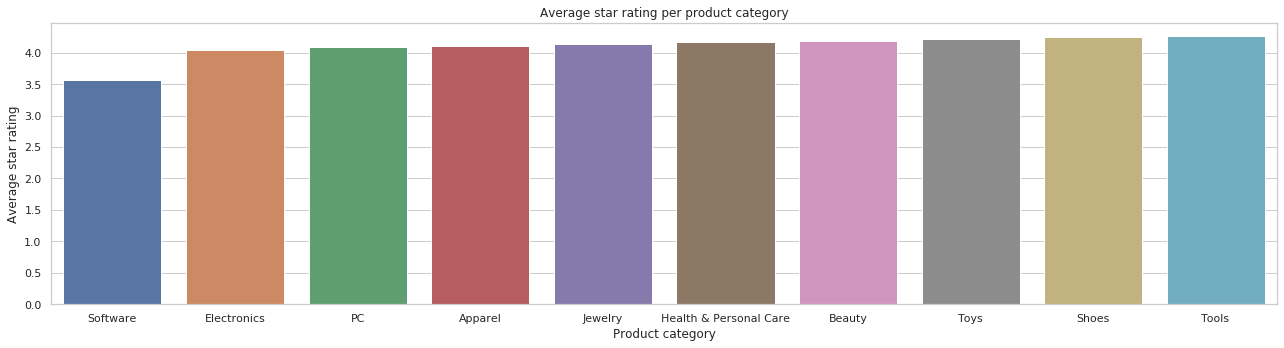

In [0]:
average_rating_per_category(total_df)

Average rating and number of ratings per year

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


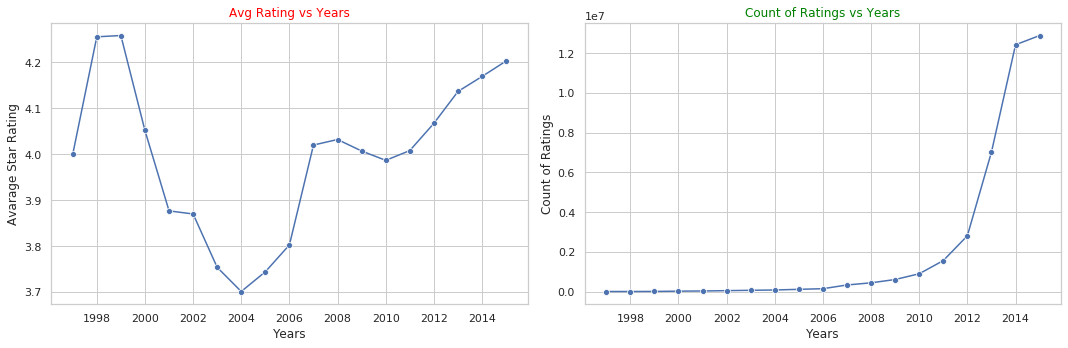

In [0]:
average_rating_and_no_of_ratings_per_year(total_df)

Distribution of star ratings and average length of reviews vs star ratings

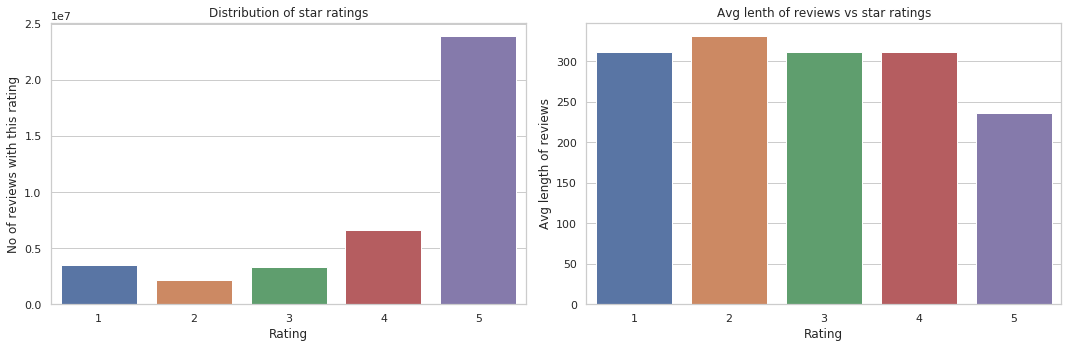

In [0]:
distr_of_star_ratings_and_avg_length_of_reviews_vs_star_ratings(total_df)

In [0]:
# Clear RAM
del total_df
gc.collect()

14432

More functions

In [0]:
def verified_count(df):
  # Returns: product_category, star_rating, verified_purchase, verified_purchase_counts
  return df.groupby(['product_category',
                     'star_rating',
                     'verified_purchase']
                    ).agg(counts=('verified_purchase','count')
                    ).reset_index()


def monthly_purchase(df):
  # Returns: Monthly purchases sorted by year for given category
  mp = pd.crosstab(df.review_date.dt.year, df.review_date.dt.strftime('%b'),
                   df.product_category, aggfunc='count',
                   rownames=['Year'], colnames=['Month'])

  # Replace NaN with 0s.
  mp.fillna(0, inplace=True)

  # Arrange by monrh
  mp = mp[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

  # Sort by Year
  mp.sort_values(by='Year', inplace=True)

  return mp


def products_reviews_count(df):

  data = {
      # 'marketplace': [df.marketplace.values[0]],
      'product_category': [df.product_category.values[0]],
      'total_products': [df.product_id.nunique()],
      'total_reviews': [df.shape[0]]
    }

  return pd.DataFrame(data=data)


def count_unique_customer(df):

  uq = df[df.verified_purchase == 'Y'].customer_id.value_counts().reset_index()
  uq.rename(columns={'customer_id': 'total_reviews', 'index': 'customer_id'}, inplace=True)

  uq['product_category'] = df.product_category.values[0]

  return uq

Iterate over all files, calling functions on each file in order to produce results.

In [0]:
# Which columns to load, using less is faster.
usecols = [0, 1, 3, 6, 7, 11, 14]

# total count for verified or not reviews (1-5) stars
verified_counts = []

# monthly purchases for all categories sorted by year
monthly_purchases = {}

# Total products/reviews counts per category
products_reviews_counts = []

# count unique customers per category
count_unique_customers = []

# files in 'data/'
files = [file for file in glob.glob('data/*.gz')]

# Iterate over all categories
for file in tqdm(files, ncols=80):

  # Category name, remove 'data/us_' and '_v1_xx.tsv.gz'
  category = file[8:-13]

  # Load Data
  df = request_dataframe(file, usecols=usecols)

  # Process
  verified_counts.append(verified_count(df))
  products_reviews_counts.append(products_reviews_count(df))
  monthly_purchases[category] = monthly_purchase(df)
  count_unique_customers.append(count_unique_customer(df))

100%|███████████████████████████████████████████| 10/10 [09:58<00:00, 51.23s/it]


In [0]:
# Concat them to get one final Dataframe
count_unique_customers = pd.concat(count_unique_customers).reset_index(drop=True)
verified_counts = pd.concat(verified_counts).reset_index(drop=True)
products_reviews_counts = pd.concat(products_reviews_counts).reset_index(drop=True)

# Sort them for better visuals
count_unique_customers = count_unique_customers.sort_values(by='total_reviews', ascending=False)
verified_counts = verified_counts.sort_values(by='counts', ascending=False)
products_reviews_counts = products_reviews_counts.sort_values(by='total_reviews', ascending=False)

Reviews for each customer id.

In [0]:
count_unique_customers.head()

,customer_id,total_reviews,product_category
0,16404530,749,Toys
10604929,4808156,503,Beauty
1,48987445,413,Toys
4009599,33315159,366,Jewelry
2,10526256,306,Toys


Star ratings for each category, verified or not.

In [0]:
verified_counts.head()

,product_category,star_rating,verified_purchase,counts
69,PC,5,Y,3680931
39,Apparel,5,Y,2995966
49,Health & Personal Care,5,Y,2805289
59,Beauty,5,Y,2711391
9,Toys,5,Y,2620290


Total products/Total Reviews for each category.

In [0]:
products_reviews_counts.head()

,product_category,total_products,total_reviews
6,PC,441955,6908283
3,Apparel,2305407,5905481
4,Health & Personal Care,489603,5331217
5,Beauty,588782,5115231
0,Toys,664017,4863800


monthly_purchases is a dict of dataframes, use appropriate category to get corresponding dataframe. e.x PC

In [0]:
monthly_purchases['PC'].head(100)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1999,0.0,0.0,0.0,0.0,0.0,0.0,21.0,26.0,31.0,44.0,76.0,186.0
2000,159.0,124.0,145.0,160.0,251.0,457.0,369.0,334.0,250.0,329.0,474.0,544.0
2001,499.0,405.0,454.0,364.0,428.0,596.0,592.0,609.0,569.0,568.0,622.0,882.0
2002,842.0,695.0,816.0,719.0,648.0,565.0,802.0,877.0,830.0,1019.0,999.0,1313.0
2003,1420.0,1114.0,1104.0,1000.0,1061.0,1118.0,1010.0,1138.0,1108.0,1091.0,1079.0,1388.0
2004,1548.0,1214.0,1308.0,1172.0,1100.0,1137.0,1103.0,947.0,1026.0,1009.0,1228.0,1333.0
2005,1438.0,1197.0,1348.0,1049.0,1000.0,1063.0,1408.0,2328.0,2507.0,1948.0,1178.0,1707.0
2006,2221.0,2766.0,3597.0,730.0,1358.0,1572.0,2305.0,2857.0,1453.0,1420.0,3783.0,2215.0
2007,8595.0,4004.0,5733.0,3103.0,5682.0,3656.0,4239.0,4424.0,4697.0,4380.0,5208.0,6164.0


Buying Trends for each epoch over the years.

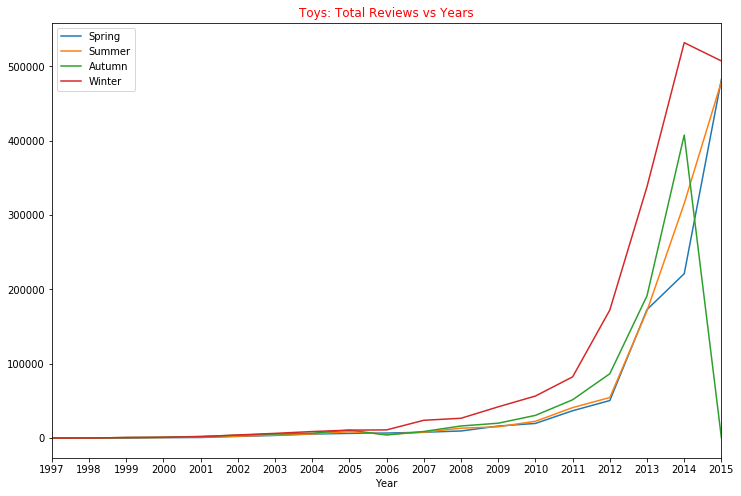

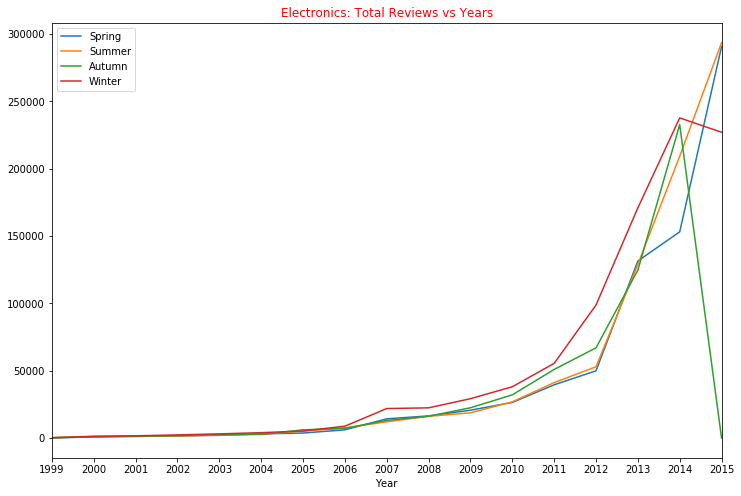

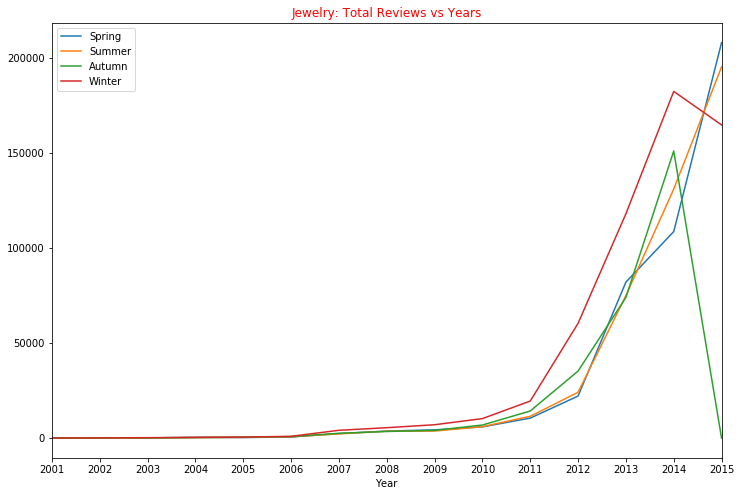

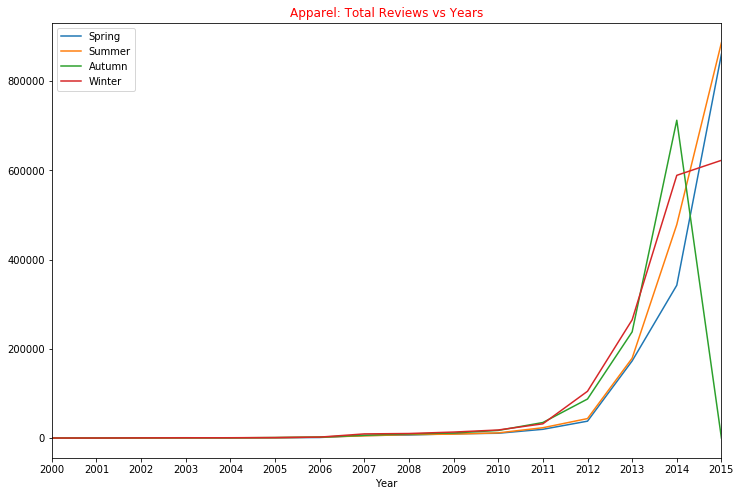

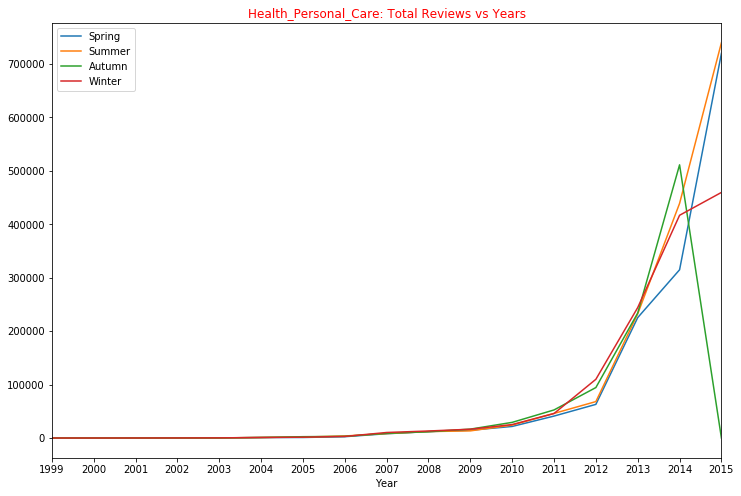

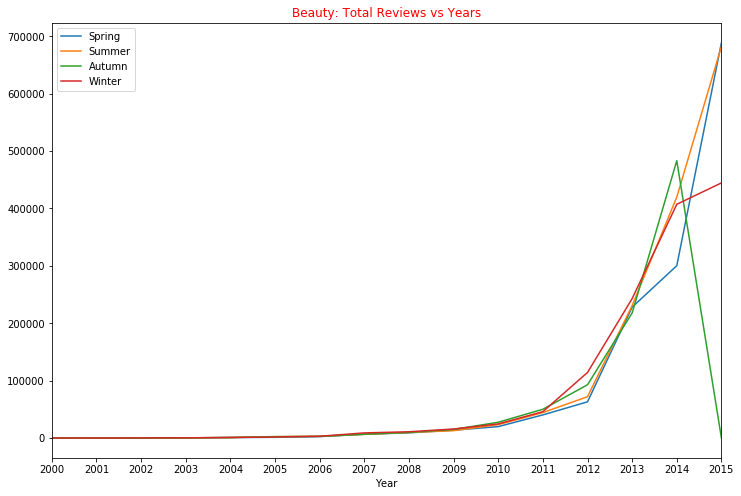

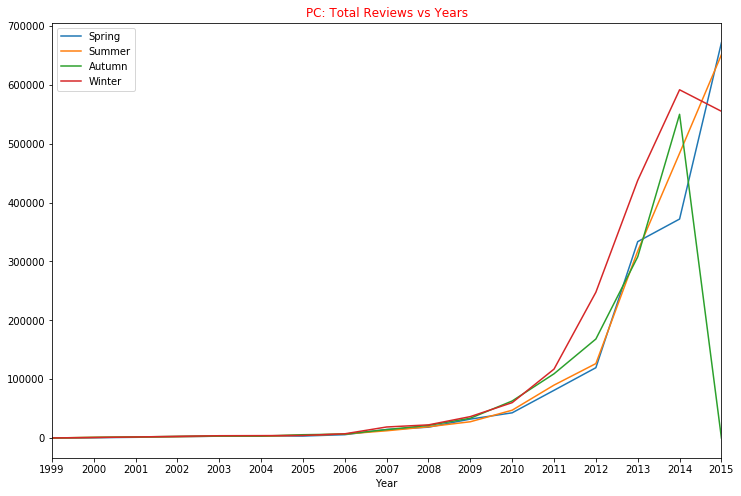

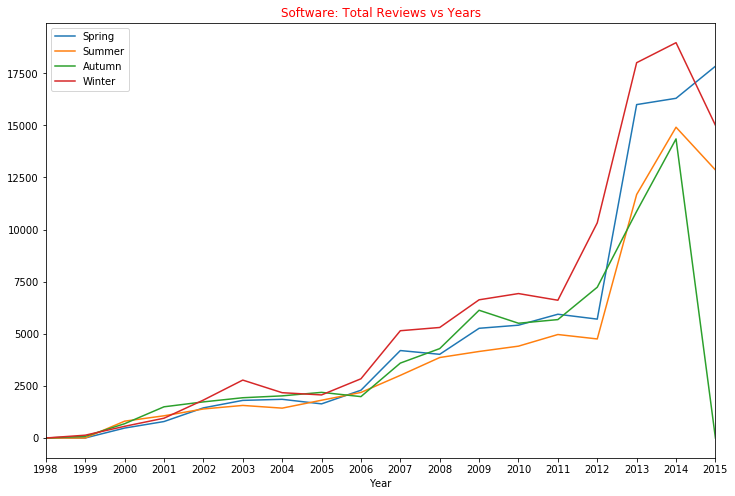

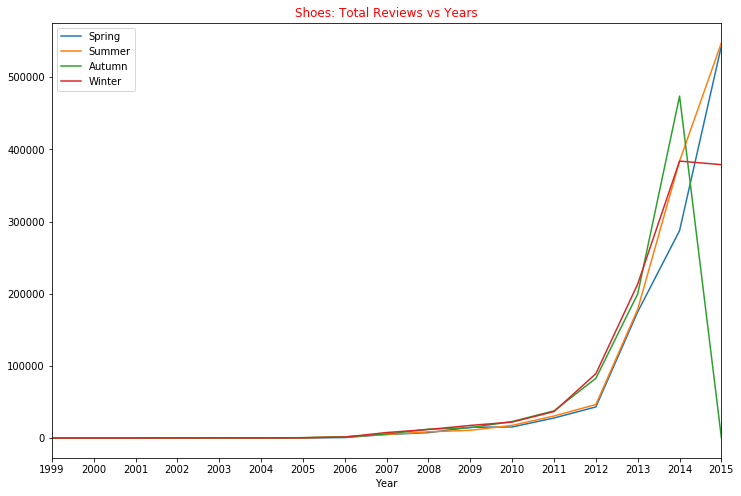

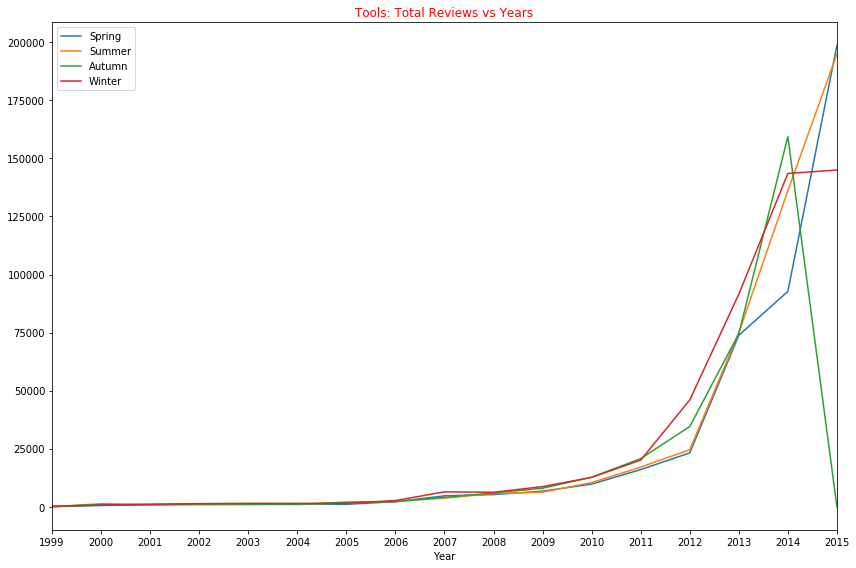

In [0]:
def plot_trend(crosstab):

  flattened = pd.DataFrame(crosstab.to_records())

  flattened['Spring'] = flattened.Mar + flattened.Apr + flattened.May
  flattened['Summer'] = flattened.Jun + flattened.Jul + flattened.Aug
  flattened['Autumn'] = flattened.Sep + flattened.Oct + flattened.Nov
  flattened['Winter'] = flattened.Dec + flattened.Jan + flattened.Feb

  flattened.set_index('Year', drop=True, inplace=True)
  
  flattened.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

  ax = flattened.plot(xticks=flattened.index, figsize=(12, 8))
  plt.title(f'{category}: Total Reviews vs Years', color='red')

for key, val in monthly_purchases.items():
  plot_trend(monthly_purchases[key])


plt.tight_layout()
plt.show()

Create a vector for each unique customer over all categories.

In [0]:
# Convert to pivot table, where each category is a column and holds total reviews given by each customer.
customer_reviews_per_category = count_unique_customers.pivot(index='customer_id', columns='product_category', values='total_reviews')
customer_reviews_per_category.fillna(0, inplace=True)
customer_reviews_per_category.head()

product_category,Apparel,Beauty,Electronics,Health & Personal Care,Jewelry,PC,Shoes,Software,Tools,Toys
customer_id,,,,,,,,,,
10003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10009,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Calculate corralation based on those vectors.

In [0]:
customer_reviews_corr = customer_reviews_per_category.iloc[:, 1:].corr()

Correlation Matrix.

In [0]:
customer_reviews_corr

product_category,Beauty,Electronics,Health & Personal Care,Jewelry,PC,Shoes,Software,Tools,Toys
product_category,,,,,,,,,
Beauty,1.000000,0.102029,0.426728,0.174999,0.107389,0.217230,0.038936,0.074667,0.126799
Electronics,0.102029,1.000000,0.181270,0.034113,0.412488,0.063146,0.119665,0.227636,0.086419
Health & Personal Care,0.426728,0.181270,1.000000,0.123782,0.177997,0.175334,0.077363,0.153455,0.151993
Jewelry,0.174999,0.034113,0.123782,1.000000,0.041739,0.156160,0.013896,0.026723,0.092003
PC,0.107389,0.412488,0.177997,0.041739,1.000000,0.066336,0.159489,0.207519,0.093672
Shoes,0.217230,0.063146,0.175334,0.156160,0.066336,1.000000,0.018754,0.054035,0.110683
Software,0.038936,0.119665,0.077363,0.013896,0.159489,0.018754,1.000000,0.077924,0.035121
Tools,0.074667,0.227636,0.153455,0.026723,0.207519,0.054035,0.077924,1.000000,0.072447
Toys,0.126799,0.086419,0.151993,0.092003,0.093672,0.110683,0.035121,0.072447,1.000000


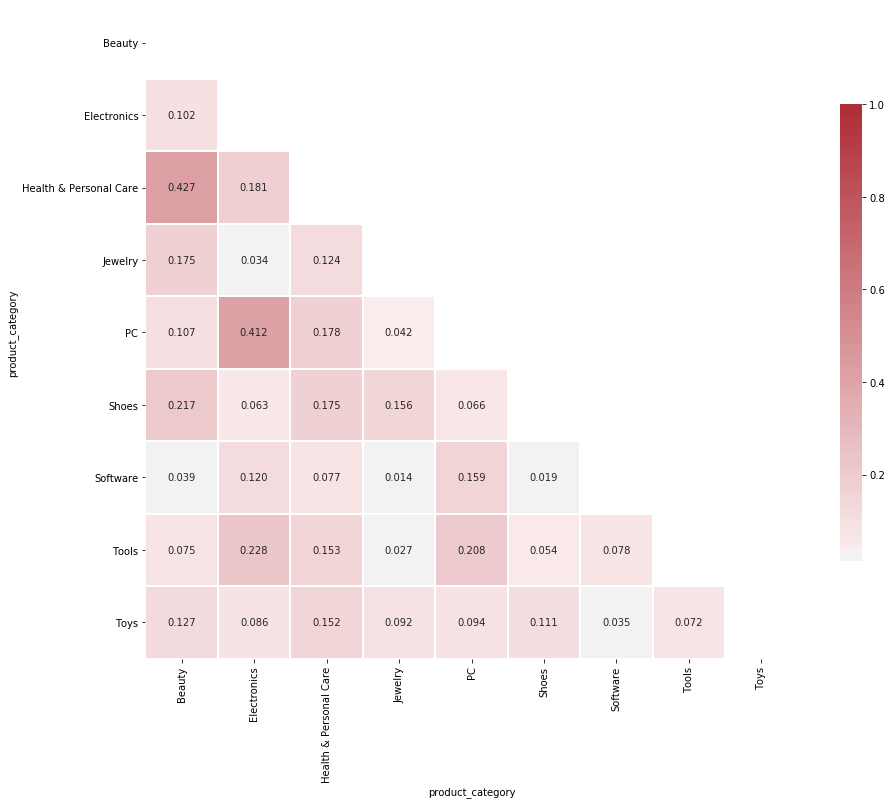

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(customer_reviews_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, l=40)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(customer_reviews_corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='0.3f',
            square=True, linewidths=1, cbar_kws={'shrink': .7})

plt.show()

Barplot for Total_products/total reviews for each category.

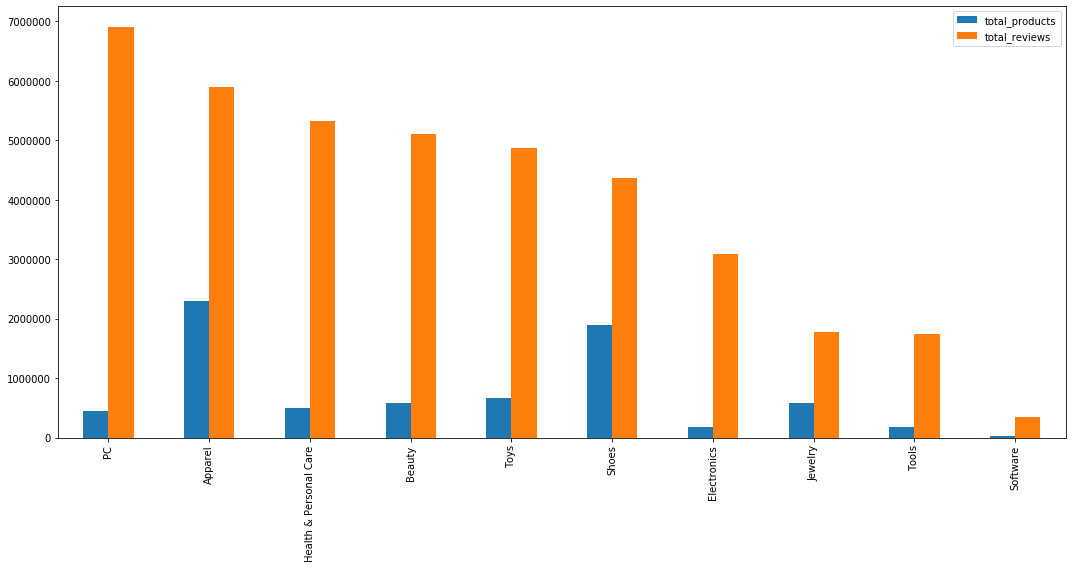

         product_category  total_products  total_reviews      ratio
6                      PC          441955        6908283  15.631191
3                 Apparel         2305407        5905481   2.561578
4  Health & Personal Care          489603        5331217  10.888857
5                  Beauty          588782        5115231   8.687818
0                    Toys          664017        4863800   7.324812
8                   Shoes         1900926        4366449   2.297012
1             Electronics          185844        3093746  16.647005
2                 Jewelry          574036        1767480   3.079040
9                   Tools          183801        1741044   9.472440
7                Software           28736         341926  11.898872


In [0]:
ax = products_reviews_counts.plot(kind='bar', figsize=(15, 8))
#ax = sns.barplot(x="product_category", y="total_reviews", hue="total_reviews", data=products_reviews_counts)
ax.set_xticklabels(products_reviews_counts.product_category)
plt.tight_layout()
plt.show()

products_reviews_counts['ratio'] = products_reviews_counts.total_reviews/products_reviews_counts.total_products
print(products_reviews_counts)

Pies!

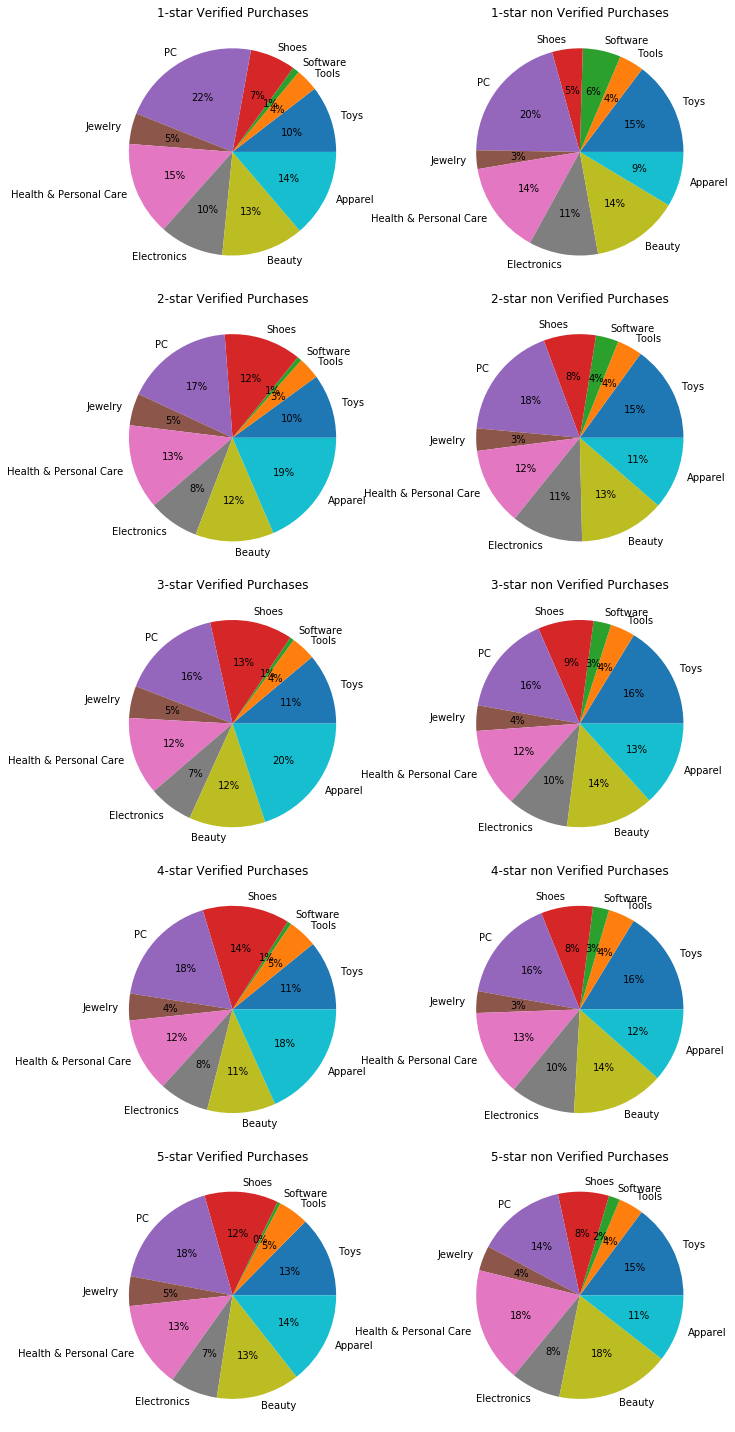

In [0]:
_, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

colors = list(mcolors.TABLEAU_COLORS.values())[:10]
for i in range(1, 6):

  df = verified_counts[verified_counts.star_rating == i]

  df_ = df[df.verified_purchase == 'Y']
  df_ = df_.sort_values(by='product_category', ascending=False)
  df_.loc[:, 'colors'] = colors
  df_.plot(ax=ax[i-1, 0], kind='pie', y='counts', labels=df_.product_category, legend=False, autopct='%1.f%%', colors=df_.colors)

  ax[i-1, 0].set_title(f'{i}-star Verified Purchases')
  ax[i-1, 0].set_ylabel('')

  df_ = df[df.verified_purchase == 'N']
  df_ = df_.sort_values(by='product_category', ascending=False)
  df_.loc[:, 'colors'] = colors
  df_.plot(ax=ax[i-1, 1], kind='pie', y='counts', labels=df_.product_category, legend=False, autopct='%1.f%%', colors=df_.colors)

  ax[i-1, 1].set_title(f'{i}-star non Verified Purchases')
  ax[i-1, 1].set_ylabel('') 


plt.tight_layout()
plt.show()

More Stats.

In [0]:
df = create_df(usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14])
df['year'] = df.review_date.dt.year

100%|███████████████████████████████████████████| 10/10 [07:03<00:00, 36.40s/it]


In [0]:
# Average start, total reviews per year
df.groupby(['year']).agg({'star_rating': [('Mean Stars', 'mean'), ('Total Reviews', 'count')]})

star_rating              
      Mean Stars Total Reviews
year                          
1997    4.000000             1
1998    4.255814            43
1999    4.258635          3619
2000    4.051943         17500
2001    3.876644         26760
2002    3.869913         43325
2003    3.753678         60693
2004    3.701050         76568
2005    3.744062        109726
2006    3.802562        140910
2007    4.020054        328416
2008    4.032114        437217
2009    4.007070        603661
2010    3.986727        893442
2011    4.007989       1556706
2012    4.067250       2805169
2013    4.136746       7024592
2014    4.169426      12420086
2015    4.203042      12886223

In [0]:
# Top 5 most helpful reviews
df.sort_values(by='helpful_votes', ascending=False).head(5)

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_date,year
6762840,52994074,R3R24QH3CDS83N,B000FI73MA,796637267,Kindle: Amazon's Original Wireless Reading Dev...,PC,5,47524,48362,Y,Why and how the Kindle changes everything,2007-11-25,2007
5633035,51121444,R2XKMDXZHQ26YX,B000OE2OLU,771086291,The Mountain Kids 100% Cotton Three Wolf Moon ...,Apparel,5,41278,41889,N,Dual Function Design,2008-11-11,2008
6422658,53025525,R2YVZNKUMWGYJ4,B003FSUDM4,57096051,"Kindle Keyboard 3G, Free 3G + Wi-Fi, 6"" E Ink ...",PC,5,31924,32373,Y,Kindle vs. Nook (updated),2010-08-28,2010
5552581,12267963,R1PL1U31XQG8KG,B0083PWAPW,270935683,"Kindle Fire HD 7"", Dolby Audio, Dual-Band Wi-Fi",PC,4,31417,32166,Y,You Get What You Pay For,2012-09-17,2012
6014420,51835976,RBUNL9QWDYTD7,B0051VVOB2,341475382,Kindle Fire (Previous Generation - 1st),PC,4,28611,29433,Y,A great device WHEN you consider price and fun...,2011-11-14,2011


In [0]:
# Customers who reviewed same products
df.groupby(['customer_id', 'product_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,customer_id,product_id,counts
29653524,41815516,B00004Y7CF,11
37092221,50848121,B00004Y3QV,10
39195955,52935813,B00006F7S2,10
38327249,52129858,B00000JNF4,10
22980626,30839367,B00008VFCU,10
29723786,41903771,B00006JHWQ,9
19703014,25398565,B00009P7I2,9
28971184,40828678,B00005QXWI,7
14018713,17633439,B0001RH9WY,7
28893797,40682067,B0000899ZP,7


In [0]:
# Customers who reviewed same products
df.groupby(['customer_id', 'product_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,customer_id,product_id,counts
29653524,41815516,B00004Y7CF,11
37092221,50848121,B00004Y3QV,10
39195955,52935813,B00006F7S2,10
38327249,52129858,B00000JNF4,10
22980626,30839367,B00008VFCU,10
29723786,41903771,B00006JHWQ,9
19703014,25398565,B00009P7I2,9
28971184,40828678,B00005QXWI,7
14018713,17633439,B0001RH9WY,7
28893797,40682067,B0000899ZP,7


In [0]:
# Clear RAM
del df, customer_reviews_per_category
gc.collect()

74464

# Machine Learning - Sentiment Analysis

In [0]:
# Import libraries
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import sys, os, re, csv, codecs
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


### Preprocessing

In [0]:
# PREPROCESSING

# Choose the columns you need as a parameter
total_df = create_df([7,12,13])
no_of_rows = 100000
# Select randomly 100000 rows from the df
my_df = pd.DataFrame({})
for i in total_df['star_rating'].unique():
  my_df = my_df.append(total_df[total_df['star_rating'] == i].sample(n = int(no_of_rows/5), replace = False), ignore_index=True)

# Keep only useful columns
my_df = my_df[['review_body','review_headline','star_rating']]
my_df['review'] = my_df[['review_body', 'review_headline']].agg(' '.join, axis=1)
# Create column for classification
my_df['classification'] = my_df['star_rating'].apply(lambda x: 1 if x>2.5 else 0) # 0 if x<3 else 1 if x==3 else 2)
y = my_df['classification']
X = my_df.loc[:, my_df.columns != 'classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Train set:',x_train.shape)
print('Test set:',x_test.shape)

# Clean data
replace_symbols_by_space = re.compile('[/(){}\[\]\|@,;]')
eng_stopwords = set(stopwords.words('english'))

def clean_text(text):
  # Lowercase text
  text = text.lower()
  # Replace symbols by space in text
  text = replace_symbols_by_space.sub(' ', text)
  # Delete stopwors from text
  text = ' '.join(word for word in text.split() if word not in eng_stopwords)
  return text

x_train["review"] = x_train["review"].apply(clean_text)
x_test["review"] = x_test["review"].apply(clean_text)

# Clear RAM
del total_df,my_df
gc.collect()

100%|███████████████████████████████████████████| 10/10 [07:27<00:00, 38.15s/it]


Train set: (67000, 4)
Test set: (33000, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


7

### Algorithms

*   Desicion Tree Classifier


In [0]:
# Decision Tree Classifier 

train_text = x_train["review"]
test_text = x_test["review"]
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_features=20000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
test_word_features = word_vectorizer.transform(test_text)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(2, 6),
    max_features=30000) 
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
test_char_features = char_vectorizer.transform(test_text)

train_features = hstack([train_char_features, train_word_features])
test_features = hstack([test_char_features, test_word_features]) 

train_target = y_train
test_target = y_test
#Define the model
tree_model = tree.DecisionTreeClassifier()
# Train the model
tree_model.fit(X = train_features, y = train_target)
# Get probability
preds = tree_model.predict_proba(X = test_features)[:, 1]
#print(np.mean(preds))
#print(tree_model.score(X = train_features, y = train_target))
print('Accuracy',tree_model.score(X = test_features, y = test_target))

Accuracy 0.7376969696969697


*   Logistic Regression




In [0]:
# Logistic Regression

train_features = hstack([train_char_features, train_word_features]) 
test_features = hstack([test_char_features, test_word_features])

train_target = y_train
#Define the model
classifier = LogisticRegression(C=0.1, solver='sag')
cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=5, scoring='accuracy')) 
print('CV score for class {} is {}'.format(y_train.name, cv_score))

classifier.fit(train_features, train_target)
print('Accuracy:',classifier.score(test_features,y_test))

CV score for class classification is 0.8419701492537314
Accuracy: 0.8443333333333334


*   Linear SVM with SGD training


In [0]:
# Linear SVM with SGD training

train_features = hstack([train_char_features, train_word_features]) 
test_features = hstack([test_char_features, test_word_features]) 

#Define the model
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=10, tol=None)
# Training the model
# Fitting the training data to the model
clf.fit(train_features,y_train)
# Making predictions with the model
svm_prediction=clf.predict(test_features)
# Evaluating model performance
ctr=0
score=0
misclassified=[]
for i,j in zip(y_test,svm_prediction):
    if i==j:
        score+=1
    ctr+=1
print ("Score :",score,"/",len(y_test))

print(accuracy_score(y_test, svm_prediction))
#print(np.mean(svm_prediction == y_test))

print(f1_score(y_test, svm_prediction, average='macro'))
print(f1_score(y_test, svm_prediction, average='micro'))
print(f1_score(y_test, svm_prediction, average='weighted'))
# Print classification report
print(classification_report(y_test, svm_prediction))
# Compute confusion matrix
cnf_mtx = confusion_matrix(y_test, svm_prediction)
print(cnf_mtx)

Score : 27317 / 33000
0.8277878787878787
0.8124644714701685
0.8277878787878787
0.8230103805453912
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     13254
           1       0.81      0.93      0.87     19746

    accuracy                           0.83     33000
   macro avg       0.84      0.80      0.81     33000
weighted avg       0.83      0.83      0.82     33000

[[ 8942  4312]
 [ 1371 18375]]


*   LSTM


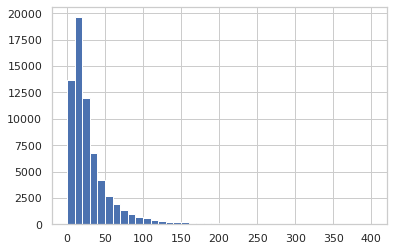

Mean length of reviews (body+headline): 31.903253731343284 words
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 128)          3840000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 10)           5560      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                550       
____________________________________________________________

In [0]:
# LSTM 

train_text = x_train["review"]
test_text = x_test["review"]

max_features = 30000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_text))
list_tokenized_train = tokenizer.texts_to_sequences(train_text)
list_tokenized_test = tokenizer.texts_to_sequences(test_text)

total_num_words = [len(review) for review in list_tokenized_train]
plt.hist(total_num_words,bins = np.arange(0,410,10))
plt.show()
print('Mean length of reviews (body+headline):',sum(total_num_words)/len(total_num_words),'words')
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

inp = Input(shape=(maxlen, )) 
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(10, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x) 
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
#Define the model
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
print(model.summary())
batch_size = 128
epochs = 2 
lstm_model = model.fit(X_t,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score, acc = model.evaluate(X_te, y_test,
                            batch_size=batch_size, verbose=1)
#print('Test score:', score)
print('Test accuracy:', acc)

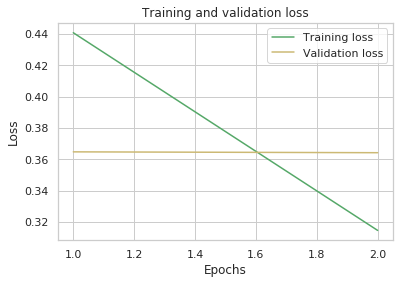

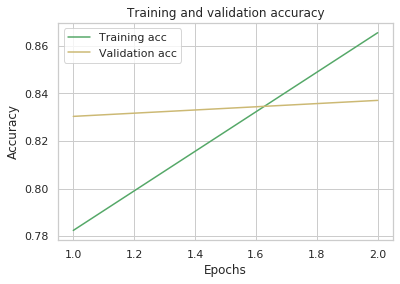

In [0]:
# Plots of loss and accuracy
plt.clf()
loss = lstm_model.history['loss']
val_loss = lstm_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = lstm_model.history['acc']
val_acc = lstm_model.history['val_acc']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Itemsets

In [0]:
# Load PC Data
df = request_dataframe('data/us_PC_v1_00.tsv.gz')
df['year'] = df.review_date.dt.year

# Keep year 2013
df = df[df.year == 2013]

In [0]:
# Convert to string
df.product_parent = df.product_parent.astype(str)

joined_df = df.groupby(['customer_id', 'year'])['product_parent'].apply(','.join)
joined_df = joined_df.reset_index()
joined_df.head()

,customer_id,year,product_parent
0,10052,2013,959287788
1,10067,2013,603357256
2,10080,2013,660150950
3,10136,2013,612062836
4,10146,2013,944948962


In [0]:
# Keep combinations of length > 1
joined_df = joined_df[joined_df.product_parent.str.contains(',')]
joined_df

,customer_id,year,product_parent
12,10367,2013,"978870549,554437936,651146058"
16,10563,2013,"584577108,56368570"
24,11049,2013,"810718557,571829280,336891384,631954520,470945..."
26,11184,2013,"462889525,200035237,603357256"
31,11359,2013,"839982486,398989010"
...,...,...,...
971658,53096052,2013,"185327228,964375521"
971663,53096270,2013,"949829144,650780817"
971666,53096363,2013,"337108060,374962352,397677674,702192632,827811..."
971669,53096402,2013,"692974962,631985698,23779211"


In [0]:
# Grab pairs
joined_df['product_parent'] = joined_df.product_parent.str.split(',')
joined_df = joined_df.product_parent.tolist()

# Throtle to 80k
joined_df = joined_df[:80000]

# 1hot encoding, use sparse to save ram
te = TransactionEncoder()
te_ary = te.fit(joined_df).transform(joined_df, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
sparse_df.shape

(80000, 48505)

In [0]:
freq_items = apriori(sparse_df, min_support=0.01, use_colnames=True)
freq_items

In [0]:
rules = association_rules(freq_items, min_threshold=0.01)
rules